In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
df = pd.read_csv("cleaned_data.csv")
X_limit=df['LIMIT_BAL'].values.reshape(-1,1)
X_education=df['EDUCATION'].values.reshape(-1,1)
y=df['default payment next month'].values
X_train,X_test,y_train,y_test=train_test_split(X_limit,y,test_size=0.2,random_state=24)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_education,y,test_size=0.2,random_state=24)

In [9]:
print(X_train.shape,y_train.shape)

(21331, 1) (21331,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [10]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
model1 = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [11]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model1.fit(X_train1,y_train1)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [13]:
y_pred_prob=model.predict_proba(X_test)
pos_prob=y_pred_prob[:,1]
y_pred_prob1=model1.predict_proba(X_test1)
pos_prob1=y_pred_prob1[:,1]
pos_prob

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [14]:
roc_auc_limit=metrics.roc_auc_score(y_test,pos_prob)
roc_auc_education=metrics.roc_auc_score(y_test1,pos_prob1)
print(roc_auc_limit,roc_auc_education)

0.6201990844642832 0.5434650477972642


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC CURVE')

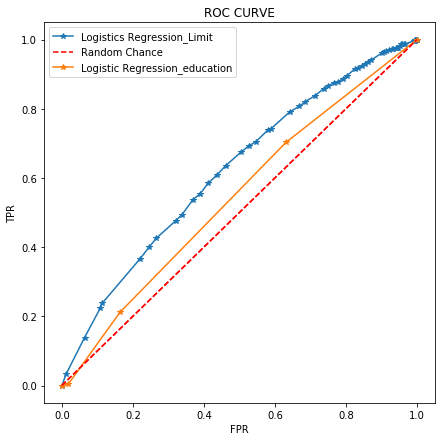

In [15]:
plt.figure(figsize=(7,7))
mpl.rcParams['font.size']=10
fpr,tpr,thresholds=metrics.roc_curve(y_test,pos_prob)
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,pos_prob1)
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr1,tpr1,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistics Regression_Limit','Random Chance','Logistic Regression_education'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
precision,recall,_=metrics.precision_recall_curve(y_test,pos_prob)

In [17]:
precision

array([0.21661665, 0.21651032, 0.21663225, 0.21667293, 0.21671362,
       0.21687653, 0.21695807, 0.21712135, 0.21724398, 0.21728488,
       0.2173258 , 0.21715363, 0.21719457, 0.21704695, 0.21716981,
       0.21725179, 0.22033243, 0.22073643, 0.22129396, 0.22189753,
       0.22198318, 0.22200354, 0.22244133, 0.22283792, 0.22392516,
       0.22441652, 0.22553363, 0.22670997, 0.22714286, 0.22761729,
       0.22985832, 0.2305063 , 0.23116659, 0.231755  , 0.23327465,
       0.23466667, 0.23569638, 0.23654424, 0.23784926, 0.23956357,
       0.24237288, 0.24342913, 0.24518744, 0.24855794, 0.25020134,
       0.25417595, 0.25845411, 0.26031164, 0.26293661, 0.26655574,
       0.27004512, 0.27573253, 0.27804107, 0.28183716, 0.28231142,
       0.28683603, 0.28744327, 0.29115934, 0.30654206, 0.31032172,
       0.31477357, 0.36617843, 0.36338028, 0.37470726, 0.42857143,
       1.        ])

In [18]:
recall

array([1.        , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
       0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
       0.9991342 , 0.9974026 , 0.9974026 , 0.9965368 , 0.9965368 ,
       0.9965368 , 0.98701299, 0.98614719, 0.98614719, 0.98614719,
       0.98268398, 0.97662338, 0.97662338, 0.97489177, 0.97402597,
       0.97402597, 0.96969697, 0.96709957, 0.96363636, 0.96190476,
       0.94112554, 0.93419913, 0.92987013, 0.92380952, 0.91774892,
       0.91428571, 0.8952381 , 0.88658009, 0.87705628, 0.87445887,
       0.86666667, 0.85800866, 0.83809524, 0.82077922, 0.80692641,
       0.79047619, 0.74112554, 0.73766234, 0.7038961 , 0.69350649,
       0.67359307, 0.63549784, 0.60952381, 0.58441558, 0.55411255,
       0.53766234, 0.49350649, 0.47619048, 0.42597403, 0.4008658 ,
       0.36709957, 0.23809524, 0.22337662, 0.13852814, 0.03376623,
       0.        ])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision Curve')

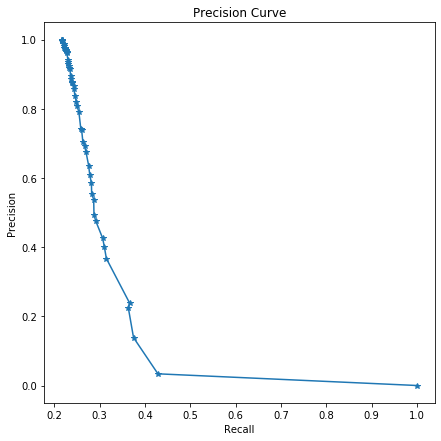

In [19]:
plt.figure(figsize=(7,7))
mpl.rcParams['font.size']=10
plt.plot(precision,recall,'*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [21]:
from sklearn.metrics import auc
auc(recall,precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [22]:
pred_prob_train=model.predict_proba(X_train)
pred_prob_train

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

Roc Value For Training Data is 0.6182918113358344


Text(0.5, 1.0, 'ROC curve for TRAIN DATA and TEST DATA')

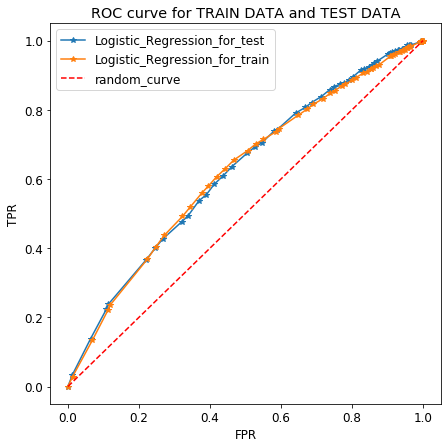

In [23]:
pos_prob_train=pred_prob_train[:,1]
roc_auc_train=metrics.roc_auc_score(y_train,pos_prob_train)
print("Roc Value For Training Data is {}".format(roc_auc_train))
plt.figure(figsize=(7,7))
mpl.rcParams['font.size']=12
fpr_train,tpr_train,threshold_train=metrics.roc_curve(y_train,pos_prob_train)
plt.plot(fpr,tpr,'*-')
plt.plot(fpr_train,tpr_train,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic_Regression_for_test','Logistic_Regression_for_train','random_curve'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for TRAIN DATA and TEST DATA')

    How is this different, conceptually and quantitatively, from your earlier calculation?


According to graph, the ROC value of TRAINING DATA is slightly less that the ROC value TESTING DATA.